Import Libraries

In [2]:
 #Import Libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error,r2_score

LoadDataset

In [47]:
 df = pd.read_csv(r'C:\Users\Subhadip\Desktop\python\laptop_prices.csv')

In [48]:
#Check the first few rows of the dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Data Preprocessing

In [8]:
# Check for missing values
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

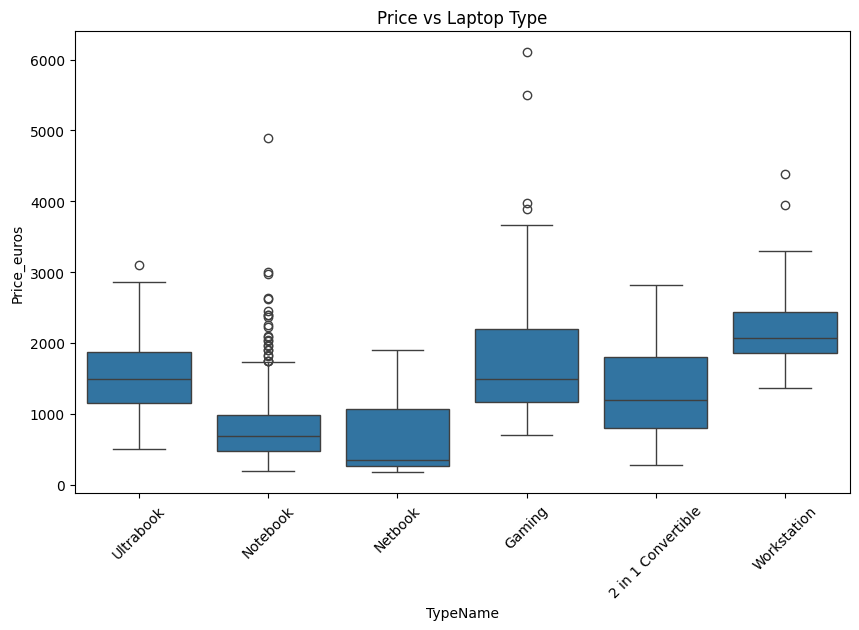

In [49]:
#Price VS TypeName
plt.figure(figsize=(10,6))
sns.boxplot(x='TypeName',y='Price_euros',data=df)
plt.title('Price vs Laptop Type')
plt.xticks(rotation=45)
plt.show()

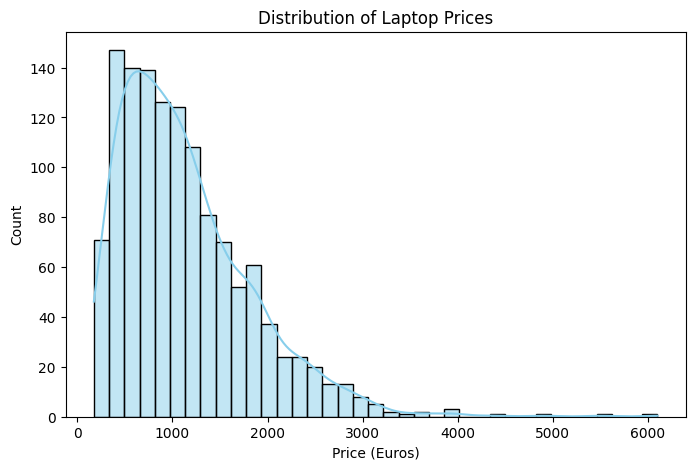

In [51]:
#Price Distribution
plt.figure(figsize=(8, 5)) 
sns.histplot(df['Price_euros'], kde=True, color='skyblue') 
plt.title('Distribution of Laptop Prices') 
plt.xlabel('Price (Euros)') 
plt.show()


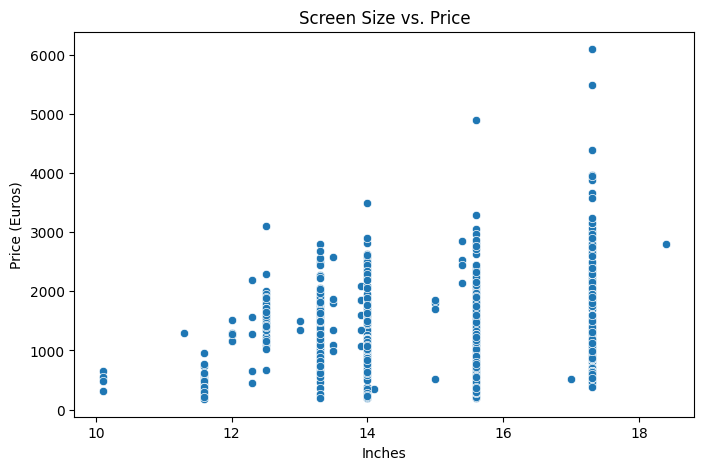

In [52]:
#Inches Vs Price
plt.figure(figsize=(8, 5)) 
sns.scatterplot(x='Inches', y='Price_euros', data=df) 
plt.title('Screen Size vs. Price') 
plt.xlabel('Inches') 
plt.ylabel('Price (Euros)') 
plt.show()

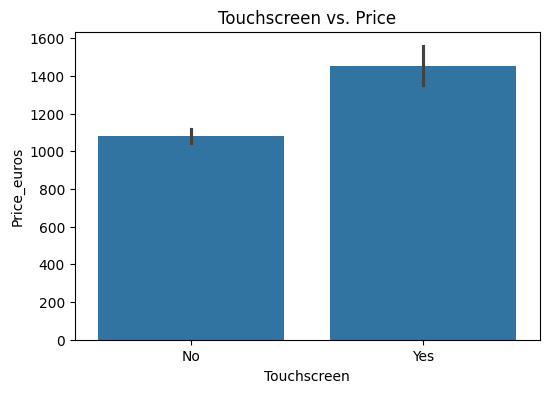

In [53]:
#TouchScreen Effect on Price
plt.figure(figsize=(6, 4)) 
sns.barplot(x='Touchscreen', y='Price_euros', data=df) 
plt.title('Touchscreen vs. Price') 
plt.show()

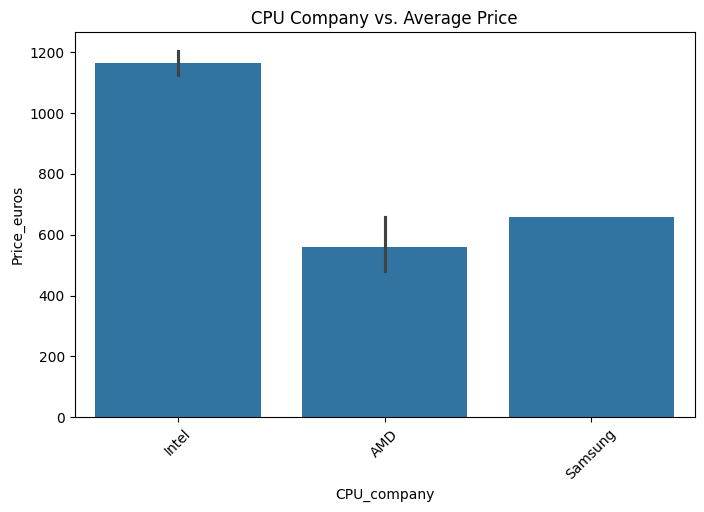

In [54]:
#CPU Company Vs Average Price
plt.figure(figsize=(8, 5)) 
sns.barplot(x='CPU_company', y='Price_euros', data=df) 
plt.title('CPU Company vs. Average Price') 
plt.xticks(rotation=45) 
plt.show()

In [55]:
#Droping Columns
df=df.drop(columns=['OS','Company','PrimaryStorageType','SecondaryStorageType'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           1275 non-null   object 
 1   TypeName          1275 non-null   object 
 2   Inches            1275 non-null   float64
 3   Ram               1275 non-null   int64  
 4   Weight            1275 non-null   float64
 5   Price_euros       1275 non-null   float64
 6   Screen            1275 non-null   object 
 7   ScreenW           1275 non-null   int64  
 8   ScreenH           1275 non-null   int64  
 9   Touchscreen       1275 non-null   object 
 10  IPSpanel          1275 non-null   object 
 11  RetinaDisplay     1275 non-null   object 
 12  CPU_company       1275 non-null   object 
 13  CPU_freq          1275 non-null   float64
 14  CPU_model         1275 non-null   object 
 15  PrimaryStorage    1275 non-null   int64  
 16  SecondaryStorage  1275 non-null   int64  


In [57]:
#Dropping Unneccessary Columns
df=df.drop(columns=['Product','CPU_model','GPU_model','Screen'])

In [58]:
#Binary Encoding
df['Touchscreen']=df['Touchscreen'].map({'Yes':1,'No':0})
df['IPSpanel']=df['IPSpanel'].map({'Yes':1,'No':0})
df['RetinaDisplay']=df['RetinaDisplay'].map({'Yes':1,'No':0})


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TypeName          1275 non-null   object 
 1   Inches            1275 non-null   float64
 2   Ram               1275 non-null   int64  
 3   Weight            1275 non-null   float64
 4   Price_euros       1275 non-null   float64
 5   ScreenW           1275 non-null   int64  
 6   ScreenH           1275 non-null   int64  
 7   Touchscreen       1275 non-null   int64  
 8   IPSpanel          1275 non-null   int64  
 9   RetinaDisplay     1275 non-null   int64  
 10  CPU_company       1275 non-null   object 
 11  CPU_freq          1275 non-null   float64
 12  PrimaryStorage    1275 non-null   int64  
 13  SecondaryStorage  1275 non-null   int64  
 14  GPU_company       1275 non-null   object 
dtypes: float64(4), int64(8), object(3)
memory usage: 149.5+ KB


In [60]:
 # Convert categorical columns to numerical using One-Hot Encoding
 df = pd.get_dummies(df, columns=['TypeName','CPU_company','GPU_company'], drop_first=True)

In [61]:
df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,...,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU_company_Intel,CPU_company_Samsung,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,1339.69,2560,1600,0,1,1,2.3,...,False,False,False,True,False,True,False,False,True,False
1,13.3,8,1.34,898.94,1440,900,0,0,0,1.8,...,False,False,False,True,False,True,False,False,True,False
2,15.6,8,1.86,575.00,1920,1080,0,0,0,2.5,...,False,False,True,False,False,True,False,False,True,False
3,15.4,16,1.83,2537.45,2880,1800,0,1,1,2.7,...,False,False,False,True,False,True,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,0,1,1,3.1,...,False,False,False,True,False,True,False,False,True,False


EDA

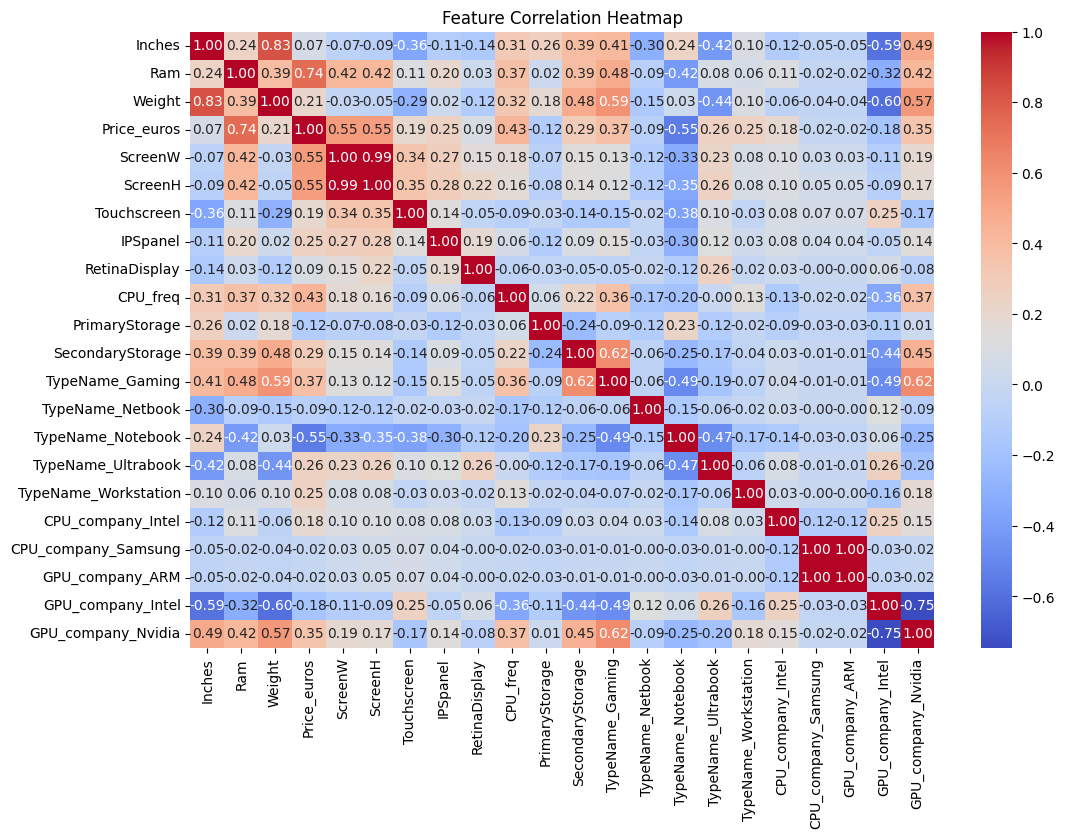

In [62]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
corr= df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

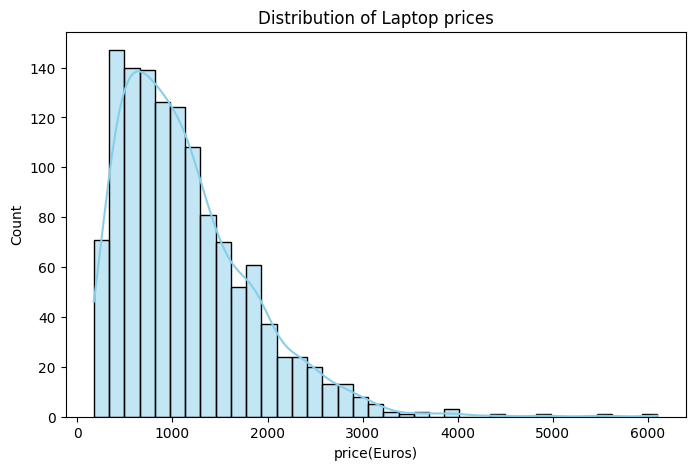

In [45]:
#Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'],kde=True,color='skyblue')
plt.title("Distribution of Laptop prices")
plt.xlabel("price(Euros)")
plt.show()

 Feature Selection

In [34]:
 # Features (independent variables)
 X = df.drop('Price_euros', axis=1)
 # Target variable (dependent Variales)
 y = df['Price_euros']
 
 

 Train-Test Split

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

 Train the Model

In [39]:
 # Initialize and train the Linear Regression model
 model = LinearRegression()
 model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [40]:
 # Predicting the price using the test set
 y_pred = model.predict(X_test)

 Evaluate the Model

In [41]:
 # Calculate Mean Squared Error
 mse = mean_squared_error(y_test, y_pred)
 print(f"Mean Squared Error: {mse}")

Mean Squared Error: 140475.8279073748


In [42]:
 # Calculate R-squared
 r2 = r2_score(y_test, y_pred)
 print(f"R-squared: {r2}")

R-squared: 0.7169761994508541


 Visualize Results

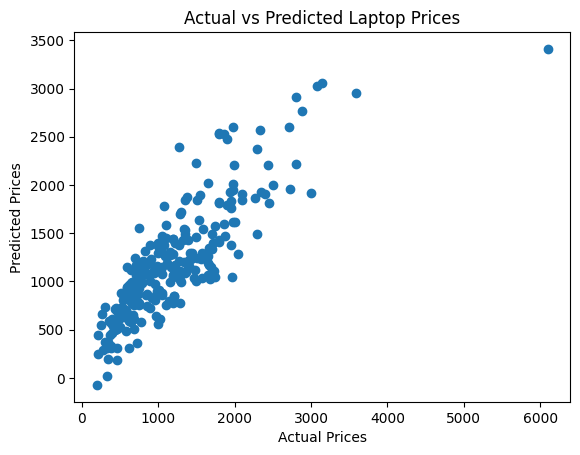

In [43]:
 #compare predicted vs actual values
 plt.scatter(y_test, y_pred)
 plt.xlabel("Actual Prices")
 plt.ylabel("Predicted Prices")
 plt.title("Actual vs Predicted Laptop Prices")
 plt.show()